# Import Stripe S82 to HATS 

In [1]:
%matplotlib inline
import lsdb
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
bandCols=['Nobs', 'mmed', 'mmu', 'msig', 'mrms', 'mchi2']
s82 = pd.read_table(
    "/mnt/beegfs/scratch/data/S82_standards/stripe82calibStars_v4.2.dat",
    header=None, 
    comment='#', 
    sep=r"\s+", 
    names=['CALIBSTARS','ra', 'dec', 'RArms', 'Decrms','Ntot','Ar']+
        ['u'+c for c in bandCols]+
        ['g'+c for c in bandCols]+
        ['r'+c for c in bandCols]+
        ['i'+c for c in bandCols]+
        ['z'+c for c in bandCols])

In [3]:
%%time
s82 = lsdb.from_dataframe(s82, catalog_name="S82", drop_empty_siblings=True, lowest_order=5, highest_order=5)

CPU times: user 50 s, sys: 25.8 s, total: 1min 15s
Wall time: 23.9 s


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - S82'}>)

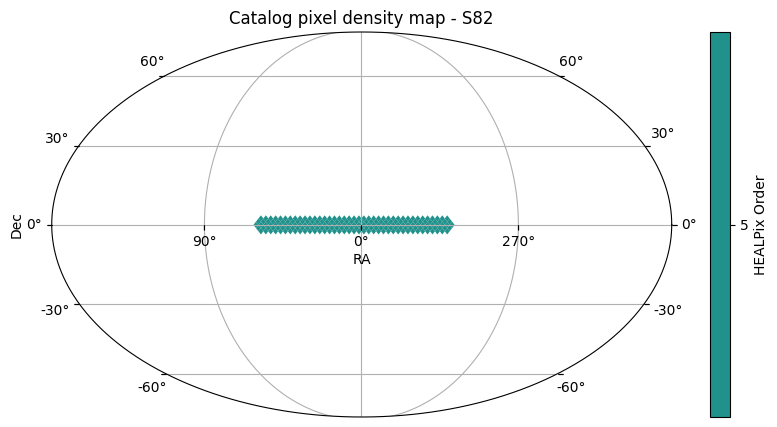

In [4]:
s82.plot_pixels()

```python
## DON'T Run THIS!!!!

from astropy.coordinates import SkyCoord

old_colnames = ['ummed', 'gmmed', 'rmmed', 'immed', 'zmmed', 'umsig', 'gmsig', 'rmsig', 'imsig', 'zmsig']
colnames = ['umag', 'gmag', 'rmag', 'imag', 'zmag', 'uErr', 'gErr', 'rErr', 'iErr', 'zErr']
col_dict=dict(zip(old_colnames, colnames))
col_dict
s82=s82.map_partitions(lambda df: df.rename(columns=col_dict))
s82=s82.map_partitions(lambda df: df.assign(Mr=-99, FeH=-99, MrEst=-99, 
                                            MrEstUnc=-99, FeHEst=-99))
s82=s82.map_partitions(lambda df: df.assign(ug=df.umag-df.gmag))
s82=s82.map_partitions(lambda df: df.assign(gr=df.gmag-df.rmag))
s82=s82.map_partitions(lambda df: df.assign(gi=df.gmag-df.imag))
s82=s82.map_partitions(lambda df: df.assign(ri=df.rmag-df.imag))
s82=s82.map_partitions(lambda df: df.assign(iz=df.imag-df.zmag))
s82=s82.map_partitions(lambda df: df.assign(ugErr=np.sqrt(df.uErr**2+df.gErr**2)))
s82=s82.map_partitions(lambda df: df.assign(grErr=np.sqrt(df.gErr**2+df.rErr**2)))
s82=s82.map_partitions(lambda df: df.assign(giErr=np.sqrt(df.gErr**2+df.iErr**2)))
s82=s82.map_partitions(lambda df: df.assign(riErr=np.sqrt(df.rErr**2+df.iErr**2)))
s82=s82.map_partitions(lambda df: df.assign(izErr=np.sqrt(df.iErr**2+df.zErr**2)))
s82=s82.map_partitions(lambda df: df.assign(glon=SkyCoord(df.ra, df.dec, unit="deg").galactic.l.deg))
s82=s82.map_partitions(lambda df: df.assign(glat=SkyCoord(df.ra, df.dec, unit="deg").galactic.b.deg))

gi_cut = (s82['gi'] > 0.2) & (s82['gi'] < 3)
s82 = s82[gi_cut]
```

In [5]:
s82.to_hats("S82_order5", overwrite=True)

In [6]:
!du -sh S82_order5/*

107M	S82_order5/dataset
4.0K	S82_order5/partition_info.csv
6.1M	S82_order5/point_map.fits
4.0K	S82_order5/properties
